In [1]:
import keras
from keras.utils import to_categorical 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, model_selection 

In [2]:
!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
wine = pd.read_csv("winequality-red.csv",sep=";",encoding="utf-8")
wine.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 84199  100 84199    0     0  69701      0  0:00:01  0:00:01 --:--:-- 69701


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
wine_data = pd.DataFrame(wine.iloc[:,:-1])
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [5]:
wine_quality = pd.DataFrame(wine.iloc[:,-1])
wine_quality.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [6]:
wine_data_n = preprocessing.normalize(wine_data.values, axis = 0)
wine_data_n[:5]

array([[0.02177213, 0.03140851, 0.        , 0.01636286, 0.01913637,
        0.014471  , 0.01493608, 0.0250342 , 0.02648119, 0.02060638,
        0.02243649],
       [0.022949  , 0.03948498, 0.        , 0.02239128, 0.02467584,
        0.03288864, 0.02943286, 0.02500911, 0.0241424 , 0.02502204,
        0.02339123],
       [0.022949  , 0.03410067, 0.0029977 , 0.01980767, 0.02316507,
        0.01973319, 0.023722  , 0.02501413, 0.02459507, 0.02391812,
        0.02339123],
       [0.03295241, 0.0125634 , 0.04196775, 0.01636286, 0.01888457,
        0.02236428, 0.02635778, 0.02503922, 0.02384062, 0.02134233,
        0.02339123],
       [0.02177213, 0.03140851, 0.        , 0.01636286, 0.01913637,
        0.014471  , 0.01493608, 0.0250342 , 0.02648119, 0.02060638,
        0.02243649]])

In [7]:
wine_data_n_train,wine_data_n_test,wine_quality_train,wine_quality_test=model_selection.train_test_split(wine_data_n,wine_quality,
                                                                                                         test_size=0.1)

In [8]:
wine_quality_train_oh=to_categorical(wine_quality_train)
wine_quality_train_oh[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [9]:
wine_quality_test_oh=to_categorical(wine_quality_test)
wine_quality_test_oh[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [10]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(11,)))
model.add(keras.layers.Dense(units=100,activation='relu'))
model.add(keras.layers.Dense(units=9,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 11)                0         
_________________________________________________________________
dense (Dense)                (None, 100)               1200      
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 909       
Total params: 2,109
Trainable params: 2,109
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics='accuracy')

In [12]:
model_train=model.fit(wine_data_n_train,wine_quality_train_oh,epochs=30,batch_size=1,
                      validation_data=(wine_data_n_test,wine_quality_test_oh))

Epoch 1/30
1439/1439 [==============================] - 2s 869us/step - loss: 1.4789 - accuracy: 0.3933 - val_loss: 1.1381 - val_accuracy: 0.4375
Epoch 2/30
1439/1439 [==============================] - 1s 497us/step - loss: 1.1946 - accuracy: 0.4018 - val_loss: 1.1298 - val_accuracy: 0.4375
Epoch 3/30
1439/1439 [==============================] - 1s 534us/step - loss: 1.1889 - accuracy: 0.4559 - val_loss: 1.1194 - val_accuracy: 0.5375
Epoch 4/30
1439/1439 [==============================] - 1s 537us/step - loss: 1.2014 - accuracy: 0.4691 - val_loss: 1.1006 - val_accuracy: 0.4500
Epoch 5/30
1439/1439 [==============================] - 1s 556us/step - loss: 1.2014 - accuracy: 0.4446 - val_loss: 1.1088 - val_accuracy: 0.4437
Epoch 6/30
1439/1439 [==============================] - 1s 499us/step - loss: 1.1834 - accuracy: 0.4710 - val_loss: 1.0824 - val_accuracy: 0.5125
Epoch 7/30
1439/1439 [==============================] - 1s 501us/step - loss: 1.1579 - accuracy: 0.4950 - val_loss: 1.0458 -

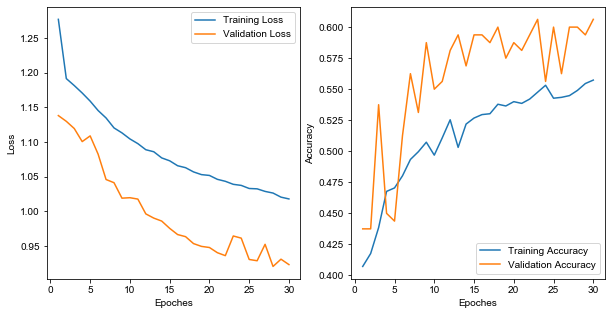

In [13]:
plt.figure(figsize=(10,5))
ax1=plt.subplot(1,2,1)
train_loss=model_train.history['loss']
train_val_loss=model_train.history['val_loss']
train_epochs=range(1,len(train_loss)+1)
ax1.plot(train_epochs,train_loss,label='Training Loss')
ax1.plot(train_epochs,train_val_loss,label='Validation Loss')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()

ax2=plt.subplot(1,2,2)
train_acc=model_train.history['accuracy']
train_val_acc=model_train.history['val_accuracy']
train_epochs=range(1,len(train_loss)+1)
ax2.plot(train_epochs,train_acc,label='Training Accuracy')
ax2.plot(train_epochs,train_val_acc,label='Validation Accuracy')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
model_pred = np.argmax(model.predict(wine_data_n_test),axis=-1) 
pd.crosstab(wine_quality_test.values.reshape(-1),model_pred, rownames=['真實數字'], colnames=['預測數字'])

預測數字,5,6,7
真實數字,,,
4,3,1,0
5,60,10,0
6,23,37,4
7,1,19,0
8,0,2,0


In [16]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(11,)))
model.add(keras.layers.Dense(units=100,activation='relu'))
model.add(keras.layers.Dense(units=100,activation='relu'))
model.add(keras.layers.Dense(units=9,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 11)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               1200      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 909       
Total params: 12,209
Trainable params: 12,209
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics='accuracy')
model_train=model.fit(wine_data_n_train,wine_quality_train_oh,epochs=30,batch_size=1,
                      validation_data=(wine_data_n_test,wine_quality_test_oh))

Epoch 1/30
1439/1439 [==============================] - 1s 785us/step - loss: 1.3783 - accuracy: 0.4040 - val_loss: 1.1440 - val_accuracy: 0.4375
Epoch 2/30
1439/1439 [==============================] - 1s 685us/step - loss: 1.2067 - accuracy: 0.4028 - val_loss: 1.1463 - val_accuracy: 0.4000
Epoch 3/30
1439/1439 [==============================] - 1s 672us/step - loss: 1.2218 - accuracy: 0.4370 - val_loss: 1.1026 - val_accuracy: 0.5625
Epoch 4/30
1439/1439 [==============================] - 1s 674us/step - loss: 1.1294 - accuracy: 0.4734 - val_loss: 1.0514 - val_accuracy: 0.5688
Epoch 5/30
1439/1439 [==============================] - 1s 669us/step - loss: 1.1444 - accuracy: 0.4963 - val_loss: 1.0402 - val_accuracy: 0.5375
Epoch 6/30
1439/1439 [==============================] - 1s 667us/step - loss: 1.1186 - accuracy: 0.4896 - val_loss: 1.0298 - val_accuracy: 0.5500
Epoch 7/30
1439/1439 [==============================] - 1s 684us/step - loss: 1.0951 - accuracy: 0.5134 - val_loss: 0.9971 -

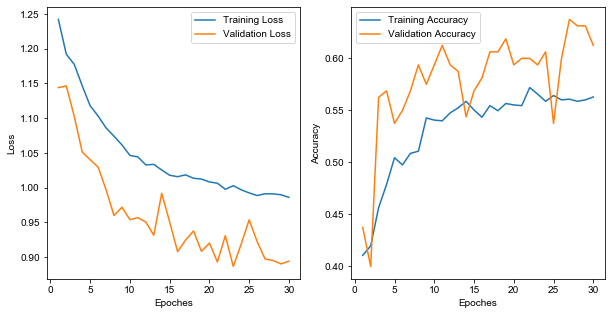

In [18]:
plt.figure(figsize=(10,5))
ax1=plt.subplot(1,2,1)
train_loss=model_train.history['loss']
train_val_loss=model_train.history['val_loss']
train_epochs=range(1,len(train_loss)+1)
ax1.plot(train_epochs,train_loss,label='Training Loss')
ax1.plot(train_epochs,train_val_loss,label='Validation Loss')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()

ax2=plt.subplot(1,2,2)
train_acc=model_train.history['accuracy']
train_val_acc=model_train.history['val_accuracy']
train_epochs=range(1,len(train_loss)+1)
ax2.plot(train_epochs,train_acc,label='Training Accuracy')
ax2.plot(train_epochs,train_val_acc,label='Validation Accuracy')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend()
plt.model_pred = np.argmax(model.predict(wine_data_n_test),axis=-1) 
pd.crosstab(wine_quality_test.values.reshape(-1),model_pred, rownames=['真實數字'], colnames=['預測數字'])show()

In [19]:
model_pred = np.argmax(model.predict(wine_data_n_test),axis=-1) 
pd.crosstab(wine_quality_test.values.reshape(-1),model_pred, rownames=['真實數字'], colnames=['預測數字'])

預測數字,5,6,7
真實數字,,,
4,3,1,0
5,54,15,1
6,15,40,9
7,1,15,4
8,0,2,0
